Haripriya Kumar(NN7365)

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil as cf
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import SGD
print(tf.__version__)


2.3.0


**Data Preprocessing**

In [3]:
image_flowers = pd.read_csv('classlabels.txt', sep=",", header=None)
image_flowers.columns = ["Image", "Class"]
image_flowers = image_flowers.sort_values('Image')
image_flowers = image_flowers.reindex(np.random.permutation(image_flowers.index))
split = int(0.7 * len(image_flowers))
train_names = image_flowers.iloc[:split]
val_names = image_flowers.iloc[split:]

train_images = train_names['Image'].tolist()
val_images = val_names['Image'].tolist()

val_names.head()

,Image,Class
335,JFT_00864.jpg,19
1044,JFT_00801.jpg,18
1462,JFT_01447.jpg,29
89,JFT_00239.jpg,6
1125,JFT_00921.jpg,20


In [4]:
file_init = 'JF30-1'
JPEG_keyword = 'jpg'
class_label_ext = 'classlabels.txt' 
train_keyword = 'Training'
validation_keyword = 'Validation'
keywords = [train_keyword,validation_keyword]

label_file_handle = open(class_label_ext, 'r')
labels_raw_image = label_file_handle.read()
labels_raw = labels_raw_image.split('\n')
label_dir =[]
if('' in labels_raw):labels_raw.remove('')
for keyword in keywords:
    img_type = []
    if keyword == train_keyword: img_type.append(train_images)
    elif keyword == validation_keyword: img_type.append(val_images)
    for a in img_type[0]:
        if(not os.path.exists(keyword)):
            os.mkdir(keyword)
        for label_format in labels_raw:
            label_dir = label_format.split(',')[1]
            file_name = label_format.split(',')[0]
            label_dir_path = keyword+'/'+label_dir
            if(not os.path.exists(label_dir_path)):
                os.mkdir(label_dir_path)
            file_name = file_name.strip()
            a = a.strip()
            if file_name.lower() == a.lower():
                file_path = JPEG_keyword+'/'+a
                cf.copy(file_path, label_dir_path)

6     70
28    68
23    67
13    66
4     66
2     65
7     64
18    63
29    63
20    61
27    61
24    60
10    60
25    56
19    55
14    54
5     54
22    49
12    48
9     46
17    45
3     41
21    38
11    36
26    35
8     28
16    24
15    13
30    12
1     11
Name: Class, dtype: int64



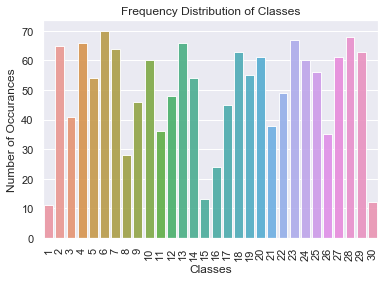

In [5]:
#Preprocessing
Class_Frequency_Count = image_flowers['Class'].value_counts()
print(str(Class_Frequency_Count) + "\n")
sns.set(style="darkgrid")
sns.barplot(Class_Frequency_Count.index,Class_Frequency_Count.values,alpha=0.9)
plt.title("Frequency Distribution of Classes")
plt.ylabel("Number of Occurances", fontsize=12)
plt.xticks(rotation=90)
plt.xlabel("Classes", fontsize=12)
plt.show()
# we see that class 6 has the highest number of occurances which is 70 

In [6]:
train_dir = 'Training'
validation_dir = 'Validation'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 40
val_batchsize = 40
 
train_generator = train_datagen.flow_from_directory( #input dataset
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory( #input dataset
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 1035 images belonging to 30 classes.
Found 444 images belonging to 30 classes.


**Model 1** **BaseLine Model**

In [7]:
# Model 1
classlabels= pd.read_csv("/Users/haripriyakumar/Desktop/BAN676/Assignment 2/classlabels.txt", sep=",")
classlabels.columns = ["Image", "Class"]
baseline = classlabels['Class'].value_counts() * 100 / len(classlabels['Class'])
print("Baseline is:",baseline[6])

Baseline is: 4.7361299052774015


**Model 2** **CNN Model**

In [23]:
# Building a CNN Model 
# Model 2
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output classes are 30
model.add(Dense(30))
model.add(Activation('softmax'))

In [24]:
# Show a summary of the model.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
activation_5 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 222, 222, 32)      18464     
_________________________________________________________________
activation_6 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)     

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [26]:
#Training the model 2
history = model.fit_generator(
train_generator,
steps_per_epoch=train_generator.samples/train_generator.batch_size ,
epochs=10,
validation_data=validation_generator,
validation_steps=validation_generator.samples/validation_generator.batch_size,
verbose=1)

Epoch 1/10
26/25 [==============================] - 87s 3s/step - loss: 3.4038 - acc: 0.0705 - val_loss: 3.2075 - val_acc: 0.1216
Epoch 2/10
26/25 [==============================] - 86s 3s/step - loss: 3.0658 - acc: 0.1188 - val_loss: 2.9214 - val_acc: 0.1779
Epoch 3/10
26/25 [==============================] - 80s 3s/step - loss: 2.8810 - acc: 0.1459 - val_loss: 2.7839 - val_acc: 0.2590
Epoch 4/10
26/25 [==============================] - 83s 3s/step - loss: 2.7428 - acc: 0.1739 - val_loss: 2.6116 - val_acc: 0.2928
Epoch 5/10
26/25 [==============================] - 83s 3s/step - loss: 2.5825 - acc: 0.2087 - val_loss: 2.4610 - val_acc: 0.3153
Epoch 6/10
26/25 [==============================] - 80s 3s/step - loss: 2.4509 - acc: 0.2725 - val_loss: 2.3242 - val_acc: 0.3626
Epoch 7/10
26/25 [==============================] - 84s 3s/step - loss: 2.3695 - acc: 0.2715 - val_loss: 2.2168 - val_acc: 0.4189
Epoch 8/10
26/25 [==============================] - 86s 3s/step - loss: 2.2832 - acc: 0.29

In [27]:
# Mode 2 Accuracy
print("Validation Accuracy:", max(history.history['val_acc']))
print("Training Accuracy", max(history.history['acc']))

Validation Accuracy: 0.44594594836235046
Training Accuracy 0.3468599021434784


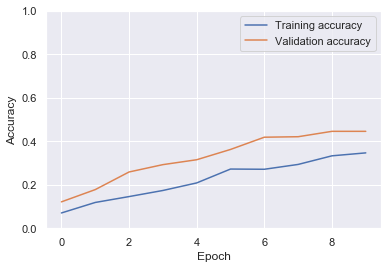

In [28]:
# Model 2 Graph
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Training accuracy')
  plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Validation accuracy')
  plt.legend()
  plt.ylim([0, 1])

plot_history(history)

**Model 3** 
**Fine Tuning Model**


In [15]:
from keras.applications import VGG16
 
vgg_conv = VGG16(weights='imagenet',include_top=False,input_shape=(224, 224, 3))

In [16]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x154a27d50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1549d2c90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x154115f90> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x1554d85d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x13bb6c450> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1554f21d0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x13bb63e10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1549975d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1554f8210> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1554f9c50> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x1554fda50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x1556d0510> False
<tensorflow.py

In [17]:
# Create the model
model = keras.models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new custom layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(30, activation= tf.nn.softmax))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 30)               

In [18]:
# check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.functional.Functional object at 0x1556f9d90> True
<tensorflow.python.keras.layers.core.Flatten object at 0x1528e8250> True
<tensorflow.python.keras.layers.core.Dense object at 0x13bb59a50> True
<tensorflow.python.keras.layers.core.Dropout object at 0x154ed4c90> True
<tensorflow.python.keras.layers.core.Dense object at 0x155718dd0> True
<tensorflow.python.keras.layers.core.Dense object at 0x155621f90> True
<tensorflow.python.keras.layers.core.Dense object at 0x155725e90> True


In [19]:
#Model 3
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history_r = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/10
26/25 [==============================] - 133s 5s/step - loss: 2.8007 - acc: 0.2357 - val_loss: 1.7465 - val_acc: 0.4887
Epoch 2/10
26/25 [==============================] - 136s 5s/step - loss: 1.5785 - acc: 0.5324 - val_loss: 1.1620 - val_acc: 0.6757
Epoch 3/10
26/25 [==============================] - 140s 5s/step - loss: 1.0121 - acc: 0.6966 - val_loss: 0.7473 - val_acc: 0.7905
Epoch 4/10
26/25 [==============================] - 144s 6s/step - loss: 0.6857 - acc: 0.7836 - val_loss: 0.5344 - val_acc: 0.8041
Epoch 5/10
26/25 [==============================] - 144s 6s/step - loss: 0.6259 - acc: 0.8039 - val_loss: 0.3533 - val_acc: 0.8964
Epoch 6/10
26/25 [==============================] - 145s 6s/step - loss: 0.4286 - acc: 0.8599 - val_loss: 0.3118 - val_acc: 0.9212
Epoch 7/10
26/25 [==============================] - 145s 6s/step - loss: 0.4008 - acc: 0.8744 - val_loss: 0.3464 - val_acc: 0.8896
Epoch 8/10
26/25 [==============================] - 149s 6s/step - loss: 0.3176 - a

In [20]:
#Model 3 - Accuracy
print("Validation Accuracy:", max(history_r.history['val_acc']))
print("Training Accuracy", max(history_r.history['acc']))

Validation Accuracy: 0.9436936974525452
Training Accuracy 0.9304347634315491


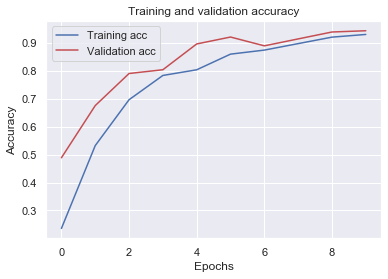

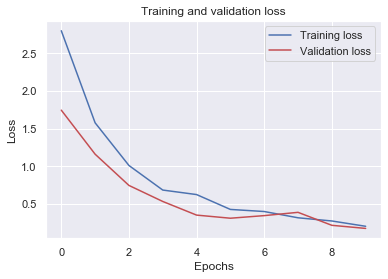

In [21]:
# Model 3 Graph
acc = history_r.history['acc']
val_acc = history_r.history['val_acc']
loss = history_r.history['loss']
val_loss = history_r.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Accuracy for     
 Baseline Model 1 - 4.73%,   
 CNN Model 2 - 44% and   
 Model 3 using fine tuning - 94%

CNN Model 2 and Model 3 using fine tuning performed better than the Baseline Model 1 and we can conclude that the Fine tuning Model is a better model as compared to the other two models as it has higher accuracy. 
